# Capstone Project - 1
Data analysis of 911 calls

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sn
%matplotlib inline

In [4]:
# reading the dataset
df = pd.read_csv('911.csv')

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [21]:
# Top 5 zip codes for 911 calls
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [23]:
# Top 5 twp (townships) for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [24]:
# Number of Unique titles
df['title'].nunique()

110

In [25]:
# Create a new column, specifying the reason of call
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [26]:
# whats the most common reason to call 911
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

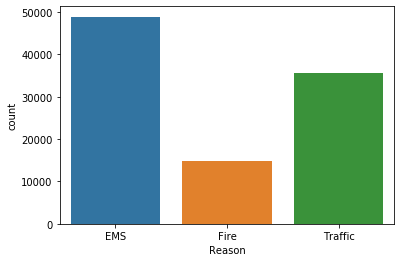

In [27]:
# countplot of 911 calls by reason
sn.countplot(df['Reason'])

In [32]:
# whats the data type of the object in timestamp column
type(df['timeStamp'].loc[1])

str

In [37]:
# convert the string to datatime format
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [38]:
#use .apply() to create 3 new columns called Hour, Month, and Day of Week
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [39]:
#Use the .map() with the dictionary to map the actual string names to the day of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [40]:
df['Day of Week'] = df['Day of Week'].map(dmap)

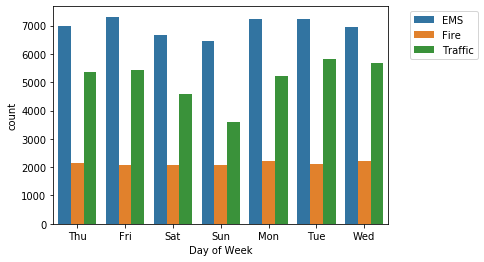

In [46]:
#create a countplot of the Day of Week column with the hue based off of the Reason column
import matplotlib.pyplot as plt
sn.countplot(x = 'Day of Week', data = df, hue = 'Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

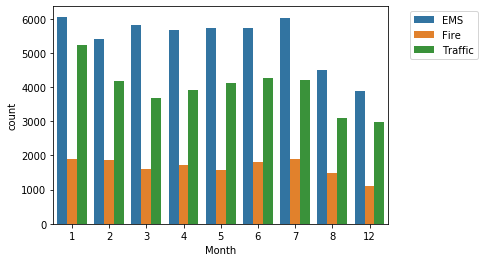

In [47]:
# Do the same for month
sn.countplot(x = 'Month', data = df, hue = 'Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [56]:
# Restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.
# Generate heatap for this data set
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


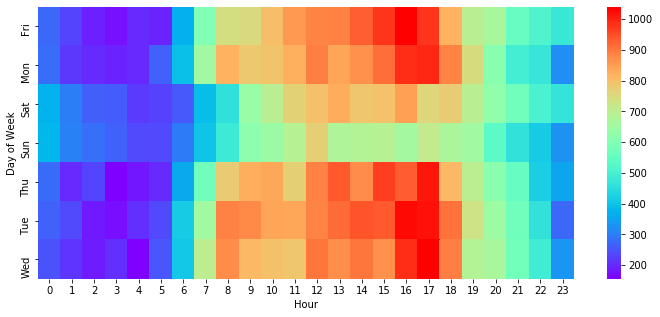

In [66]:
plt.figure(figsize = (12,5))
sn.heatmap(data = dayHour, cmap = 'rainbow')

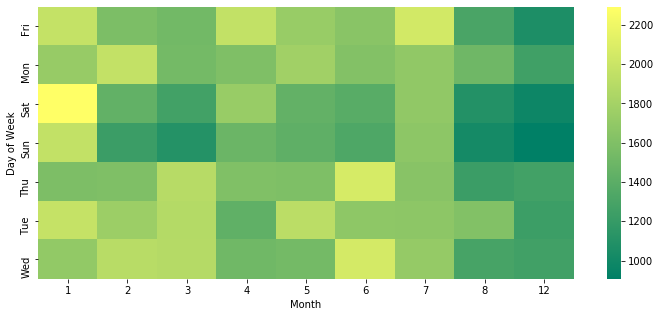

In [73]:
# construct same for Month Vs Days of Week
dayMon = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
plt.figure(figsize = (12,5))
sn.heatmap(data = dayMon, cmap = 'summer')